<a href="https://colab.research.google.com/github/ahmedabdelhameed/TensorFlow/blob/main/Vanilla_Autoencoder_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple vanilla autoecncoder implementation tested on MNIST dataset

In [1]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
#Downloading the dataset
(x_train_orig, y_train), (x_test_orig, y_test) = mnist.load_data()
x_train = x_train_orig.astype('float32') / 255.
x_test = x_test_orig.astype('float32') / 255.

x_train = x_train.reshape((x_train.shape[0], np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Building the encoder
x = Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = LeakyReLU(name="encoder_output")(encoder_dense_layer2)

In [4]:
encoder= Model(x, encoder_output, name="encoder_model")
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 300)               235500    
_________________________________________________________________
encoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 2)                 602       
_________________________________________________________________
encoder_output (LeakyReLU)   (None, 2)                 0         
Total params: 236,102
Trainable params: 236,102
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Building the decoder
decoder_input = Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = LeakyReLU(name="decoder_output")(decoder_dense_layer2)

In [6]:
decoder = Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
decoder_dense_1 (Dense)      (None, 300)               900       
_________________________________________________________________
decoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
decoder_dense_2 (Dense)      (None, 784)               235984    
_________________________________________________________________
decoder_output (LeakyReLU)   (None, 784)               0         
Total params: 236,884
Trainable params: 236,884
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Building the autoencoder
ae_input = Input(shape=(784), name="autoencoder_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = Model(ae_input, ae_decoder_output, name="autoencoder_model")
ae.summary()

Model: "autoencoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
autoencoder_input (InputLaye [(None, 784)]             0         
_________________________________________________________________
encoder_model (Functional)   (None, 2)                 236102    
_________________________________________________________________
decoder_model (Functional)   (None, 784)               236884    
Total params: 472,986
Trainable params: 472,986
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compiling the AE model
ae.compile(loss="mse", optimizer=Adam(0.0005))

In [9]:
ae.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/30
235/235 [==============================] - 3s 5ms/step - loss: 0.0678 - val_loss: 0.0551
Epoch 2/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0548 - val_loss: 0.0541
Epoch 3/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0537 - val_loss: 0.0530
Epoch 4/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0529 - val_loss: 0.0523
Epoch 5/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0518 - val_loss: 0.0511
Epoch 6/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0506 - val_loss: 0.0495
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0491 - val_loss: 0.0486
Epoch 8/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0480 - val_loss: 0.0479
Epoch 9/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0476 - val_loss: 0.0474
Epoch 10/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0472 - val_loss: 0.0470

In [10]:
encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)

decoded_images = np.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

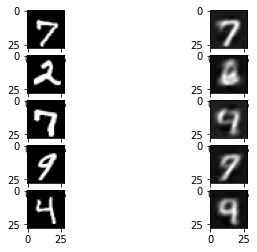

In [11]:
num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = np.random.randint(low=0, high=x_train.shape[0])
    plt.subplot(num_images_to_show, 2, plot_ind)
    plt.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    plt.subplot(num_images_to_show, 2, plot_ind+1)
    plt.imshow(decoded_images[rand_ind, :, :], cmap="gray")

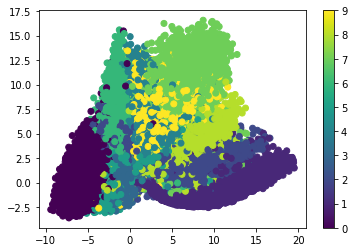

In [12]:
plt.figure()
plt.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train) 
plt.colorbar()